# Fit a CNN model to the sklearn.datasets.fetch_olivetti_faces() and compare with the PCA+SVC model trained in class. (Links to an external site.) HINT: The dataset is small, it might be beneficial to use data augmentation.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces() 
print("Keys:", faces.keys()) 
print("Total samples and image size:", faces.images.shape)
print("Total samples and features:", faces.data.shape)
print("Total samples and targets:", faces.target.shape)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/vinay/scikit_learn_data
Keys: dict_keys(['data', 'images', 'target', 'DESCR'])
Total samples and image size: (400, 64, 64)
Total samples and features: (400, 4096)
Total samples and targets: (400,)


In [2]:
print(faces.images[0].shape)

(64, 64)


In [3]:
print(faces.data[0].shape)

(4096,)


In [4]:
print(faces.target[0].size)

1


In [5]:
print(faces.images[0])

[[0.30991736 0.3677686  0.41735536 ... 0.37190083 0.3305785  0.30578512]
 [0.3429752  0.40495867 0.43801653 ... 0.37190083 0.338843   0.3140496 ]
 [0.3429752  0.41735536 0.45041323 ... 0.38016528 0.338843   0.29752067]
 ...
 [0.21487603 0.20661157 0.2231405  ... 0.15289256 0.16528925 0.17355372]
 [0.20247933 0.2107438  0.2107438  ... 0.14876033 0.16115703 0.16528925]
 [0.20247933 0.20661157 0.20247933 ... 0.15289256 0.16115703 0.1570248 ]]


In [6]:
print(faces.data[0])

[0.30991736 0.3677686  0.41735536 ... 0.15289256 0.16115703 0.1570248 ]


In [7]:
print(faces.target[0])

0


In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

In [9]:
images = faces.images

In [10]:
features = faces.data  
targets = faces.target 

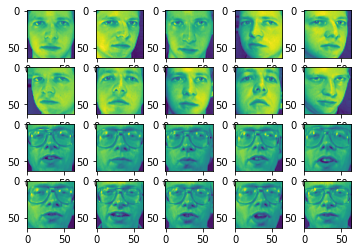

In [11]:
fig = plt.figure() # create a new figure window
for i in range(20): # display 20 images
    # subplot : 4 rows and 5 columns
    img_grid = fig.add_subplot(4, 5, i+1)
    # plot features as image
    img_grid.imshow(images[i])

plt.show()

# Function for plotting the images

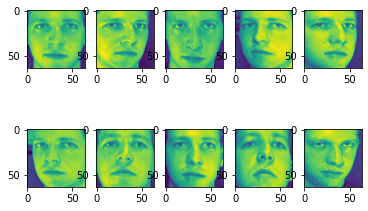

In [13]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces

# function for plotting images
def plot_images(images, total_images=20, rows=4, cols=5):
    fig = plt.figure() # create a new figure window
    for i in range(total_images): # display 20 images
        # subplot : 4 rows and 5 columns
        img_grid = fig.add_subplot(rows, cols, i+1)
        # plot features as image
        img_grid.imshow(images[i])

faces = fetch_olivetti_faces() # download the dataset at ~/scikit_learn_data
# print("Keys:", faces.keys()) # display keys
# print("Total samples and image size:", faces.images.shape)
# print("Total samples and features:", faces.data.shape)
# print("Total samples and targets:", faces.target.shape)

images = faces.images # save images

# note that images can not be saved as features, as we need 2D data for
# features, whereas faces.images are 3D data i.e. (samples, pixel-x, pixel-y)
features = faces.data  # features
targets = faces.target # targets

# plot 10 images with 2 rows and 5 columns
plot_images(images, 10, 2, 5)
plt.show()

# Prediction using SVM model


In [14]:
# function for plotting images
def plot_images(images, total_images=20, rows=4, cols=5):
    fig = plt.figure() # create a new figure window
    for i in range(total_images): # display 20 images
        # subplot : 4 rows and 5 columns
        img_grid = fig.add_subplot(rows, cols, i+1)
        # plot features as image
        img_grid.imshow(images[i])


In [15]:
faces = fetch_olivetti_faces()

In [16]:
images = faces.images

In [17]:
features = faces.data  # features
targets = faces.target 

In [24]:
from sklearn.model_selection import train_test_split
# split the training and test data
train_features, test_features, train_targets, test_targets = train_test_split(
        features, targets,
        train_size=0.8,
        test_size=0.2,
        # random but same for all run, also accuracy depends on the
        # selection of data e.g. if we put 10 then accuracy will be 1.0
        # in this example
        random_state=23,
        # keep same proportion of 'target' in test and target data
        stratify=targets
    )


In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# use SVC
classifier = SVC(kernel="linear") # default kernel=rbf
# training using 'training data'
classifier.fit(train_features, train_targets) # fit the model for training data

# predict the 'target' for 'training data'
prediction_training_targets = classifier.predict(train_features)
self_accuracy = accuracy_score(train_targets, prediction_training_targets)
print("Accuracy for training data (self accuracy):", self_accuracy)

# predict the 'target' for 'test data'
prediction_test_targets = classifier.predict(test_features)
test_accuracy = accuracy_score(test_targets, prediction_test_targets)
print("Accuracy for test data:", test_accuracy)

Accuracy for training data (self accuracy): 1.0
Accuracy for test data: 0.9875


# Plot first 20 images from the test-images and predicted-images

In [25]:
print("Wrongly detected image-locations: ", end=' ')
for i in range (20):
    # if images are not same then print location of images
    if test_targets[i] != prediction_test_targets[i]:
        print(i)

Wrongly detected image-locations:  14


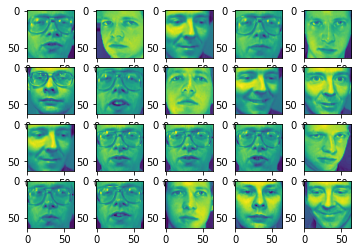

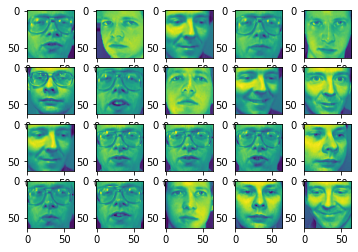

In [26]:
# store test images in list
faces_test = []
for i in test_targets:
    faces_test.append(images[i])

# store predicted images in list
faces_predict = []
for i in prediction_test_targets:
    faces_predict.append(images[i])

# plot the first 20 images from the list
plot_images(faces_test, total_images=20)
plot_images(faces_predict, total_images=20)
plt.show()
